In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from perceptron import Perceptron


s = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# df = pd.read_csv(s, header=None, encoding="utf-8")
df = pd.read_csv("iris_data.csv")

print(df.tail())

     5.1  3.5  1.4  0.2     Iris-setosa
144  6.7  3.0  5.2  2.3  Iris-virginica
145  6.3  2.5  5.0  1.9  Iris-virginica
146  6.5  3.0  5.2  2.0  Iris-virginica
147  6.2  3.4  5.4  2.3  Iris-virginica
148  5.9  3.0  5.1  1.8  Iris-virginica


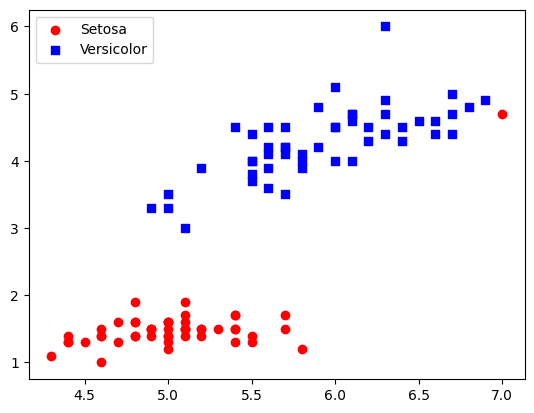

In [2]:
# select setosa and versicolor
y = df.iloc[0:100, 4].values
# iris-setosa turns to 0; all other flowers would be a 1. in this case, it's only one other flower - versicolor, hence the binary format.
y = np.where(y == "Iris-setosa", 0, 1)

# Select 0th and 2nd column; each example is a horizontal vector of two features.
X = df.iloc[0:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1], color="red", marker="o", label="Setosa")
plt.scatter(X[50:100, 0], X[50:100, 1], color="blue", marker="s", label="Versicolor")
plt.legend(loc="upper left")
plt.show()


Iteration 0
w: [0. 0.] , b: 0.0
Update:  None
update, xi, b: -0.01 [4.9 1.4] -0.01
update, xi, b: 0.01 [7.  4.7] 0.0
Iteration 1
w: [0.021 0.033] , b: 0.0
Update:  0.0
update, xi, b: -0.01 [4.9 1.4] -0.01
update, xi, b: 0.01 [7.  4.7] 0.0
Iteration 2
w: [0.042 0.066] , b: 0.0
Update:  0.0
update, xi, b: -0.01 [4.9 1.4] -0.01
update, xi, b: -0.01 [4.7 1.3] -0.02
update, xi, b: 0.01 [7.  4.7] -0.01
Iteration 3
w: [0.016 0.086] , b: -0.01
Update:  0.0
update, xi, b: -0.01 [4.9 1.4] -0.02
Iteration 4
w: [-0.033  0.072] , b: -0.02
Update:  0.0
Iteration 5
w: [-0.033  0.072] , b: -0.02
Update:  0.0
Iteration 6
w: [-0.033  0.072] , b: -0.02
Update:  0.0
Iteration 7
w: [-0.033  0.072] , b: -0.02
Update:  0.0
Iteration 8
w: [-0.033  0.072] , b: -0.02
Update:  0.0
Iteration 9
w: [-0.033  0.072] , b: -0.02
Update:  0.0


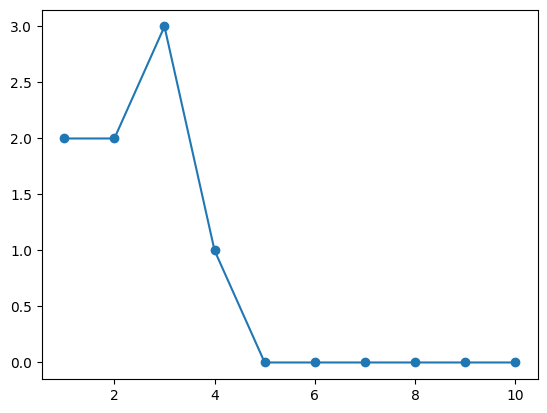

In [3]:
ppn = Perceptron(eta=0.01, n_iter=10, random_state=2)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker="o")

# np.where

In [4]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map 
    markers = ('o', 's', "^", "v", "<")
    colors = ("red", "blue", "lightgreen", "gray", "cyan")
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1    
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha = 0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f"Class {cl}",
                    edgecolor="black")

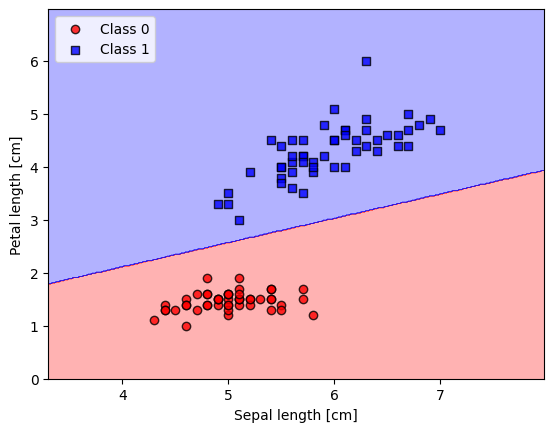

In [5]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel("Sepal length [cm]")
plt.ylabel("Petal length [cm]")
plt.legend(loc="upper left")
plt.show()